# SUYASH PRATAP SINGH

The purpose of the test is to tell if there is any significant difference between two data sets.

Suppose that after n=100 flips, we get h=61 heads. We choose a significance level of 0.05: is the coin fair or not? Our null hypothesis is: the coin is fair (q=1/2). We set these variables:

In [1]:
import numpy as np
import scipy.stats as st
import scipy.special as sp
n = 100  # number of coin flips
h = 61  # number of heads
q = .5  # null-hypothesis of fair coin

Compute the z-score, which is defined by the following formula (xbar is the estimated average of the distribution)

In [2]:
xbar = float(h) / n
z = (xbar - q) * np.sqrt(n / (q * (1 - q)))
# We don't want to display more than 4 decimals.
z

2.1999999999999997

Compute P-value

In [3]:
pval = 2 * (1 - st.norm.cdf(z))
pval

0.02780689502699718

# Conclusion:-
This p-value is less than 0.05, so we reject the null hypothesis and conclude that the coin is probably not fair.

# Hypothesis Testing for unknown Variance of Population

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
from scipy.stats import t

In [5]:
# t_score for sampling distributions

def t_score(sample_size, sample_mean, pop_mean, s):
    numerator = sample_mean - pop_mean
    denomenator = s / sample_size**0.5
    return numerator / denomenator

In [6]:
# code calculate s value
def s_value(lst):
    avg = sum(lst) / len(lst)
    var = sum((x-avg)**2 for x in lst) / (len(lst)-1)
    s = var**0.5
    return s

# Question -1 
Pista House selling Hyderabadi Chicken Dum biryani claims that each parcel packet has 500 grams of biryani (also mentioned on the label of packet). You are sceptic of their claims and believe that on average each packet does not contain 500 grams of biryani. How do you prove your claim? Given that the population std is 50

In [7]:
l = [490, 220, 470, 500, 495, 496, 496, 498, 508, 480]

sum(l)/len(l)

465.3

In [8]:
# Two tail

alpha = 1 - 0.95

t_critical = t.ppf(1-alpha/2, df = 9)

print(t_critical)

2.2621571627409915


df refers to degree of freedom = n - 1 = 10 - 1 = 9

In [9]:
# Defining the sample and population parameters

sample_size = 10
sample_mean = 465.3
pop_mean = 500
print('*'* 30)
print()
s = s_value(l)
print("sample size(n) = ",sample_size)
print("sample mean(x bar) = ",sample_mean)
print("pop mean (mu) = ", pop_mean)
print("s = ", s)
print()
print('*'*30)

******************************

sample size(n) =  10
sample mean(x bar) =  465.3
pop mean (mu) =  500
s =  86.84859110991827

******************************


In [10]:
# Calculating the t-score

t = t_score(sample_size, sample_mean, pop_mean, s)

print(t)

-1.2634751284446715


In [11]:
# Ploting the sampling distribution with rejection regions

# Defining the x minimum and x maximum
x_min = 200
x_max = 800


# Defining the sampling distribution mean and sampling distribution std
mean = pop_mean
std = s / (sample_size)**0.5

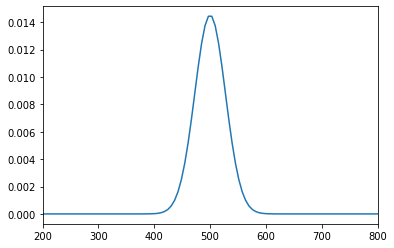

In [12]:
# Ploting the graph and setting the x limits
x = np.linspace(x_min, x_max, 100)
y = norm.pdf(x, mean, std)
plt.xlim(x_min, x_max)
plt.plot(x, y)


# Computing the left and right critical values (Two tailed Test)
t_critical_left = pop_mean + (-t_critical * std)
t_critical_right = pop_mean + (t_critical * std)

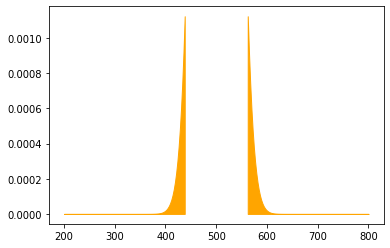

In [13]:
# Shading the left rejection region
x1 = np.linspace(x_min, t_critical_left, 100)
y1 = norm.pdf(x1, mean, std)
plt.fill_between(x1, y1, color='orange')


# Shading the right rejection region
x2 = np.linspace(t_critical_right, x_max, 100)
y2 = norm.pdf(x2, mean, std)
plt.fill_between(x2, y2, color='orange')

Text(465.3, 0.0007, 'x_bar')

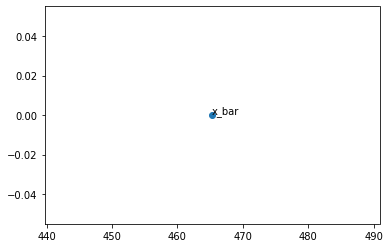

In [14]:
# Ploting the sample mean and concluding the results 
plt.scatter(sample_mean, 0)
plt.annotate("x_bar", (sample_mean, 0.0007))

Text(465.3, 0.0007, 'x_bar')

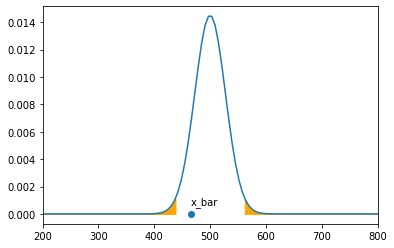

In [15]:
# Ploting the sampling distribution with rejection regions

# Defining the x minimum and x maximum
x_min = 200
x_max = 800


# Defining the sampling distribution mean and sampling distribution std
mean = pop_mean
std = s / (sample_size)**0.5


# Ploting the graph and setting the x limits
x = np.linspace(x_min, x_max, 100)
y = norm.pdf(x, mean, std)
plt.xlim(x_min, x_max)
plt.plot(x, y)


# Computing the left and right critical values (Two tailed Test)
t_critical_left = pop_mean + (-t_critical * std)
t_critical_right = pop_mean + (t_critical * std)


# Shading the left rejection region
x1 = np.linspace(x_min, t_critical_left, 100)
y1 = norm.pdf(x1, mean, std)
plt.fill_between(x1, y1, color='orange')


# Shading the right rejection region
x2 = np.linspace(t_critical_right, x_max, 100)
y2 = norm.pdf(x2, mean, std)
plt.fill_between(x2, y2, color='orange')

# Ploting the sample mean and concluding the results 
plt.scatter(sample_mean, 0)
plt.annotate("x_bar", (sample_mean, 0.0007))

In this case sample mean does not falls in the rejection region i.e. here we fail to reject the Null Hypothesis

In [16]:

# Conclusion using z test

if(np.abs(t) > t_critical):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

Fail to reject Null Hypothesis


In [17]:
# Conclusion using p test

p_value = 2 * (1.0 - norm.cdf(np.abs(t)))

print("p_value = ", p_value)

if(p_value < alpha):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

p_value =  0.20641847943818092
Fail to reject Null Hypothesis


# Question-2
 You have developed a new Natural Language Processing Algorithms and done a user study. You claim that the average rating given by the users is greater than 4 on a scale of 1 to 5. How do you prove this to your client? ~(Given that the population std is 0.5)~

In [18]:

l1 = [4, 3, 5, 4, 5, 3, 5, 5, 4, 2, 4, 5, 5, 4, 4, 5, 4, 5, 4, 5]

sum(l1)/len(l1)

4.25

In [19]:
# Defining the sample and population parameters

sample_size = 10
sample_mean = 4.25
pop_mean = 4
print('*'* 30)
print()
s = s_value(l1)
print("sample size(n) = ",sample_size)
print("sample mean(x bar) = ",sample_mean)
print("pop mean (mu) = ", pop_mean)
print("s = ", s)
print()
print('*'*30)

******************************

sample size(n) =  10
sample mean(x bar) =  4.25
pop mean (mu) =  4
s =  0.8506963092234007

******************************


In [21]:
# Calculating the t-score

t = t_score(sample_size, sample_mean, pop_mean, s)

print(t)

0.9293203772845853


Text(4.25, 0.1, 'x_bar')

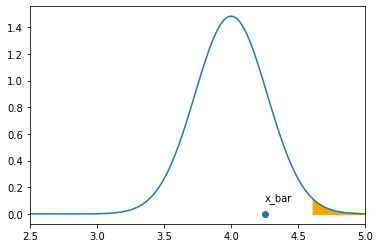

In [22]:
# Defining the x minimum and x maximum
x_min = 2.5
x_max = 5.0


# Defining the sampling distribution mean and sampling distribution std
mean = pop_mean
std = s / (sample_size**0.5)


# Ploting the graph and setting the x limits
x = np.linspace(x_min, x_max, 100)
y = norm.pdf(x, mean, std)
plt.xlim(x_min, x_max)
plt.plot(x, y)


# Computing the right critical value (Right tailed Test)
t_critical_right = pop_mean + (t_critical * std)


# Shading the right rejection region
x1 = np.linspace(t_critical_right, x_max, 100)
y1 = norm.pdf(x1, mean, std)
plt.fill_between(x1, y1, color='orange')


# Ploting the sample mean and concluding the results 
plt.scatter(sample_mean, 0)
plt.annotate("x_bar", (sample_mean, 0.1))

In this case sample mean does not falls in the rejection region i.e.It fails to Reject the Null Hypothesis

In [23]:
# Conclusion using t test

if(t > t_critical):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

Fail to reject Null Hypothesis


In [24]:
# Conclusion using p test

p_value = 1.0 - norm.cdf(np.abs(t))

print("p_value = ", p_value)

if(p_value < alpha):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

p_value =  0.17636153894527018
Fail to reject Null Hypothesis


# Question-3
TATA has developed a better fuel management system for the SUV segment. They claim that with this system, on average the SUV's mileage is at least 15 km/litre? ~(Given that the population std is 1)~

In [25]:

l2 = [14.08, 14.13, 15.65, 13.78, 16.26, 14.97, 15.36, 15.81, 14.53, 16.79, 15.78, 16.98, 13.23, 15.43, 15.46, 13.88, 14.31, 14.41, 15.76, 15.38]

sum(l2)/len(l2)

15.098999999999998

In [26]:
# Defining the sample and population parameters

sample_size = 20
sample_mean = 15.1
pop_mean = 15
print('*'* 30)
print()
s = s_value(l2)
print("sample size(n) = ",sample_size)
print("sample mean(x bar) = ",sample_mean)
print("pop mean (mu) = ", pop_mean)
print("s = ", s)
print()
print('*'*30)

******************************

sample size(n) =  20
sample mean(x bar) =  15.1
pop mean (mu) =  15
s =  1.0253671999517255

******************************


In [30]:

t = t_score(sample_size, sample_mean, pop_mean, s)

print(t)

0.4361496988795929


Text(15.1, 0.1, 'x_bar')

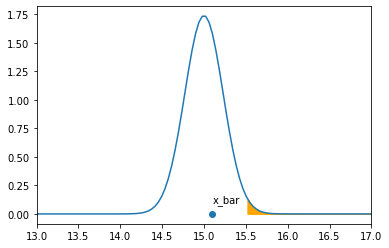

In [31]:

x_min = 13
x_max = 17

mean = pop_mean
std = s / (sample_size**0.5)

x = np.linspace(x_min, x_max, 100)
y = norm.pdf(x, mean, std)

plt.xlim(x_min, x_max)
plt.plot(x, y)

t_critical_right = pop_mean + (t_critical * std)

x1 = np.linspace(t_critical_right, x_max, 100)
y1 = norm.pdf(x1, mean, std)
plt.fill_between(x1, y1, color='orange')

plt.scatter(sample_mean, 0)
plt.annotate("x_bar", (sample_mean, 0.1))

In this case sample mean does not falls in the rejection region i.e. Fail to Reject the Null Hypothesis

In [32]:

# Conclusion using t test

if(t > t_critical):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

Fail to reject Null Hypothesis


In [33]:
# Conclusion using p test

p_value = 1.0 - norm.cdf(np.abs(t))

print("p_value = ", p_value)

if(p_value < alpha):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

p_value =  0.33136406031033616
Fail to reject Null Hypothesis


# Question-4
You have developed a new Machine Learning Application and claim that on average it takes less than 100 ms to predict for any future datapoint. How do you convince your client about this claim? ~(Based on past data you know that the std is 10 ms)~

In [34]:

# Defining the sample and population parameters

sample_size = 100
sample_mean = 97.5
pop_mean = 100
print('*'* 30)
print()
s = 7
print("sample size(n) = ",sample_size)
print("sample mean(x bar) = ",sample_mean)
print("pop mean (mu) = ", pop_mean)
print("s = ", s)
print()
print('*'*30)

******************************

sample size(n) =  100
sample mean(x bar) =  97.5
pop mean (mu) =  100
s =  7

******************************


In [35]:
# Calculating the t-score

t = t_score(sample_size, sample_mean, pop_mean, s)

print(t)

-3.5714285714285716


Text(97.5, 0.02, 'x_bar')

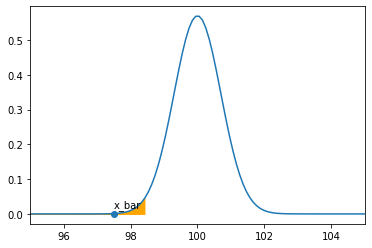

In [36]:
x_min = 95
x_max = 105

mean = pop_mean
std = s / (sample_size**0.5)

x = np.linspace(x_min, x_max, 100)
y = norm.pdf(x, mean, std)

plt.xlim(x_min, x_max)


plt.plot(x, y)

t_critical_left = pop_mean + (-t_critical * std)

x1 = np.linspace(x_min, t_critical_left, 100)
y1 = norm.pdf(x1, mean, std)
plt.fill_between(x1, y1, color='orange')

plt.scatter(sample_mean, 0)
plt.annotate("x_bar", (sample_mean, 0.02))

In this case sample mean falls in the rejection region i.e. Reject Null Hypothesis

In [37]:

if(t < -t_critical):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

Reject Null Hypothesis


In [38]:

p_value = 1.0 - norm.cdf(np.abs(t))

print("p_value = ", p_value)

if(p_value < 0.01):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

p_value =  0.00017751969037349546
Reject Null Hypothesis


# Chi square test

In [39]:
import numpy as np

d1 = [5, 8, 3, 8]
d2 = [9, 6, 8, 5]
d3 = [8, 12, 7, 2]
d4 = [4, 16, 7, 3]
d5 = [3, 9, 6, 5]
d6 = [7, 2, 5, 7]

dice = np.array([d1, d2, d3, d4, d5, d6])

In [40]:
dice.dtype

dtype('int32')

In [41]:
#converting into categorical dtype
import pandas as pd
d1 = pd.Categorical(d1)
d2 = pd.Categorical(d2)
d3 = pd.Categorical(d3)
d4 = pd.Categorical(d4)
d5 = pd.Categorical(d5)
d6 = pd.Categorical(d6)
lst = [d1,d2,d3,d4,d5,d6]
df = pd.DataFrame(lst) 
df

,0,1,2,3,4,5
0,5,9,8,4,3,7
1,8,6,12,16,9,2
2,3,8,7,7,6,5
3,8,5,2,3,5,7


In [43]:
from scipy import stats 

In [44]:
#stats.chi2_contingency(dice)

chi2, p, dof, ex = stats.chi2_contingency(df, correction=False)
print("chi2 :",chi2)
print("P_value: ",p)
print("degree of freedom:",dof)
print('\n')
print("ex :",ex)

chi2 : 23.315671914716496
P_value:  0.07766367301496693
degree of freedom: 15


ex : [[ 5.57419355  6.50322581  6.73548387  6.96774194  5.34193548  4.87741935]
 [ 8.20645161  9.57419355  9.91612903 10.25806452  7.86451613  7.18064516]
 [ 5.57419355  6.50322581  6.73548387  6.96774194  5.34193548  4.87741935]
 [ 4.64516129  5.41935484  5.61290323  5.80645161  4.4516129   4.06451613]]


Pvalues > 0.01 hence donot reject the null hypothesis.

# Z-test
Get zscore on the above dice data using stats.zscore module from scipy. Convert zscore values to p-value and take mean of the array.

In [45]:
import scipy.stats as sc
z_scores = sc.zscore(dice)
z_scores

array([[-0.46291005, -0.18884739, -1.83711731,  1.44115338],
       [ 1.38873015, -0.64208114,  1.22474487,  0.        ],
       [ 0.9258201 ,  0.7176201 ,  0.61237244, -1.44115338],
       [-0.9258201 ,  1.62408759,  0.61237244, -0.96076892],
       [-1.38873015,  0.03776948,  0.        ,  0.        ],
       [ 0.46291005, -1.54854863, -0.61237244,  0.96076892]])

In [46]:

import scipy as sc
p_values = 1 - sc.special.ndtr(z_scores)
#p_value = sc.norm.pdf(abs(z_scores))
p_values

array([[0.67828558, 0.57489379, 0.96690371, 0.07477068],
       [0.08245741, 0.73958975, 0.11033568, 0.5       ],
       [0.17726974, 0.23649578, 0.27014569, 0.92522932],
       [0.82273026, 0.05217856, 0.27014569, 0.83166582],
       [0.91754259, 0.48493574, 0.5       , 0.5       ],
       [0.32171442, 0.93925487, 0.72985431, 0.16833418]])

In [47]:
#z_scores.mean()
p_values.mean()

0.49478056512575197

Pvalues > 0.05 hence donot reject null hypothesis.

# Paired sample t-test

A Paired sample t-test compares means from the same group at different times.

The basic two sample t-test is designed for testing differences between independent groups. In some cases, you might be interested in testing differences between samples of the same group at different points in time. We can conduct a paired t-test using the scipy function stats.ttest_rel().

In [50]:
before= stats.norm.rvs(scale=30, loc=100, size=500) ## Creates a normal distribution with a mean value of 100 and std of 30
after = before + stats.norm.rvs(scale=5, loc=-1.25, size=500)

In [51]:
before.shape

(500,)

In [52]:
after.shape

(500,)

In [49]:
stats.ttest_rel(before,after)

Ttest_relResult(statistic=7.33406709007853, pvalue=9.088947178040553e-13)

Pvalues < 0.05. Hence reject the null hypothesis. Ho says mu1 = mu2 & Ha m1 !=m2

# Question-5:
You are a manager of a chinese restaurant. You want to determine whether the waiting time to place an order has changed in the past month from its previous population mean value of 4.5 minutes. State the null and alternative hypothesis.



# Answer:
Null Hypothesis : Ho = 4.5

The waiting time has not changed in the past month from previous months and the mean is equal to 4.5minutes.

Alternative Hypothesis : Ha != 4.5

The waiting time to place an order has changed in the past month from previous months and the mean is not equal to 4.5minutes.

# Question-6
Explain  Type I error and Type II error

Type I error : (alpha)
Bymistake rejecting a null hypothesis when it is true(also known as a "false positive" finding or conclusion), Alpha is the probability of rejecting null hypothesis when it is true.It is the level of significance of test. (1-Alpha) is the probability of accepting the null hypothesis when it is true.It is the confidence level of the test.

Type II error: (Beta)
Accepting the null hypothesis when it is false(also known as a "false negative" finding or conclusion). Beta is the probability of accepting the null hypothesis when it is false. It is the (1-Beta) is the power of test. How clear the demarcation between the null and alternate hypothesis.

# ANOVA

# Question 7
If you need to compare more than two data sets at a time, an ANOVA is your best bet.

The results from three experiments with overlapping 95% confidence intervals are given below, and we want to confirm that the results for all three experiments are not significantly different.

But before conducting ANOVA, test equality of variances (using Levene's test) is satisfied or not. If not, then mention that we cannot depend on the result of ANOVA

In [53]:
import numpy as np

e1 = np.array([1.595440,1.419730,0.000000,0.000000])
e2 = np.array([1.433800,2.079700,0.892139,2.384740])
e3 = np.array([0.036930,0.938018,0.995956,1.006970])

#Assumption: All the 3 datasets (e1,e2 & e3) are random, independent, parametric & normally distributed

In [54]:

# check the equality of variances and normality of various distribution
stats.levene(e1,e2,e3)

LeveneResult(statistic=2.6741725711150446, pvalue=0.12259792666001798)

Pvalue > 0.05, Do not Reject the Ho. Meaning atleast one one the variances are unequal.Hence,we cannot depend on the result of ANOVA

# Question 8
The one-way ANOVA tests the null hypothesis that two or more groups have the same population mean. The test is applied to samples from two or more groups, possibly with differing sizes.

use stats.f_oneway() module to perform one-way ANOVA test

In [55]:
stats.f_oneway(e1,e2,e3)

F_onewayResult(statistic=2.51357622845924, pvalue=0.13574644501798466)

Pvalues > 0.05 .Hence donot reject the null hypothesis. Meaning two or more groups not have the same population mean

# Thank you